In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm  
%matplotlib inline

In [2]:
L = 10
T = 0.02

gamma = 5/3
v_L, rho_L, P_L = 0, 13, 10e5
v_R, rho_R, P_R = 0, 1.3, 1e5

h = 0.2
tau = 1e-5
CFL_max = 0.05

n_x = int((2*L) / h) + 1
n_t = int(T / tau) + 1

p = np.zeros((n_t, n_x))
pu = np.zeros((n_t, n_x))
pe = np.zeros((n_t, n_x))

In [3]:
# генерация пространственной сетки
x = np.arange(-L, L+h, h)

In [4]:
# начальные условия
for i in range(n_x):
    if i < n_x // 2:
        p[0, i] = rho_L
        pu[0, i] = rho_L * v_L
        pe[0, i] = P_L  / (gamma - 1) 
    else:
        p[0, i] = rho_R
        pu[0, i] = rho_R * v_R
        pe[0, i] = P_R / (gamma - 1)

In [5]:
W = np.zeros((n_t, n_x, 3))
W[0, :, 0] = p[0, :]
W[0, :, 1] = pu[0, :]
W[0, :, 2] = pe[0, :]

In [6]:
t0 = 0
t = [t0]

for n in tqdm(range(n_t-1)):
    for m in range(1, n_x-1):
        
        rho = W[n, m, 0]
        rho_u = W[n, m, 1]
        rho_e = W[n, m, 2]
        u = rho_u / rho
        e = rho_e / rho
        c = np.sqrt(gamma*(gamma-1)*e)

        A = np.array([[0, 1, 0],
                     [-u**2, 2*u, (gamma-1)],
                     [-u*e*gamma, gamma*e, u]])
        Omega = np.array([[-u*c, c, (gamma-1)],
                         [-c**2, 0, (gamma-1)],
                         [u*c, -c, (gamma-1)]])
        Omega_inv = np.linalg.inv(Omega)
        
        lambda_1 = u + c
        lambda_2 = u
        lambda_3 = u - c
        Big_lambda = np.array([[lambda_1, 0, 0], 
                               [0, lambda_2, 0], 
                               [0, 0, lambda_3]])
        
        CFL = tau * np.max(np.abs(Big_lambda)) / h
        if CFL > CFL_max:
            tau = tau / 2
                   
        W[n+1, m] = W[n, m] - (tau/(2*h)) * (A @ (W[n, m+1] - W[n, m-1])) + (tau/(2*h)) * ((Omega_inv @ np.abs(Big_lambda) @ Omega) @ (W[n, m+1] - 2*W[n, m] + W[n, m-1]))
    
    # граничные условия:
    W[n+1][0] = W[n+1][1]
    W[n+1][-1] = W[n+1][-2]         
                  
    t.append(t[n] + tau)
    
        
t = np.array(t)

  0%|          | 0/1999 [00:00<?, ?it/s]

In [7]:
t_view = 0.015  # время наблюдения
index = np.where(np.abs(t - t_view) <= 1e-6)[0][0]
index

1500

In [8]:
rho = W[index, :, 0]
rho_u = W[index, :, 1]
rho_e = W[index, :, 2]
u = rho_u / rho
e = rho_e / rho
Pressure = (gamma-1) * rho * e

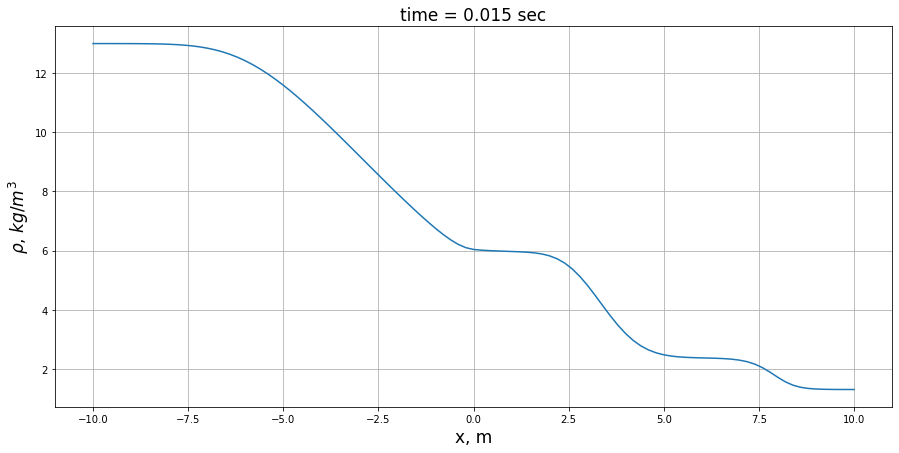

In [9]:
plt.figure(figsize=(15, 7))

plt.plot(x, rho)
plt.xlabel('x, m', fontsize=17)
plt.ylabel(r'$\rho$, $kg/m^3$', fontsize=17)
plt.title('time = 0.015 sec', fontsize=17)
plt.grid()

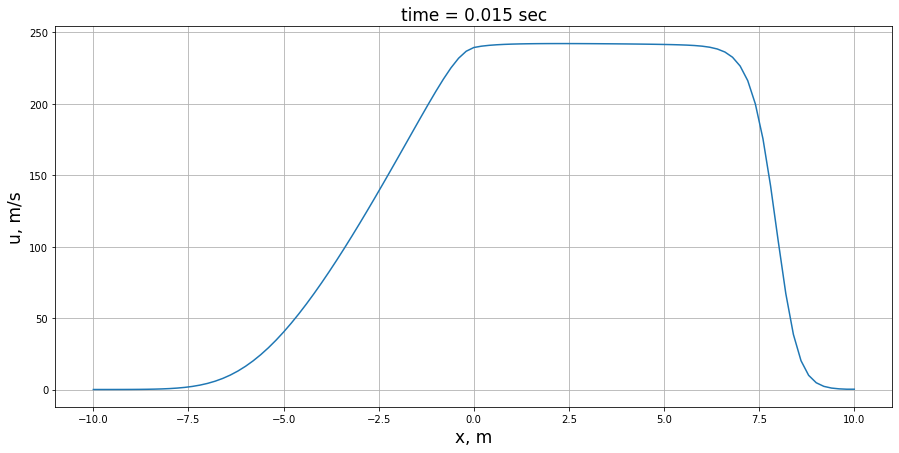

In [10]:
plt.figure(figsize=(15, 7))

plt.plot(x, u)
plt.xlabel('x, m', fontsize=17)
plt.ylabel('u, m/s', fontsize=17)
plt.title('time = 0.015 sec', fontsize=17)
plt.grid()

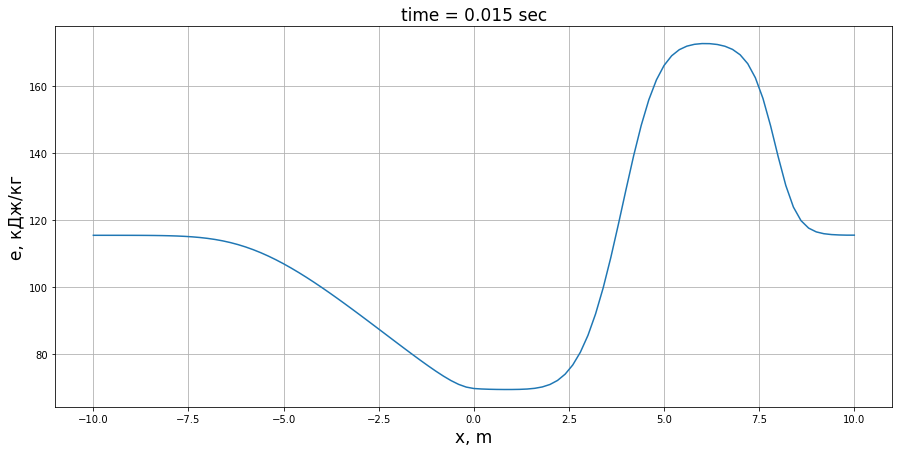

In [11]:
plt.figure(figsize=(15, 7))

plt.plot(x, 1e-3*e)
plt.xlabel('x, m', fontsize=17)
plt.ylabel('e, кДж/кг', fontsize=17)
plt.title('time = 0.015 sec', fontsize=17)
plt.grid()

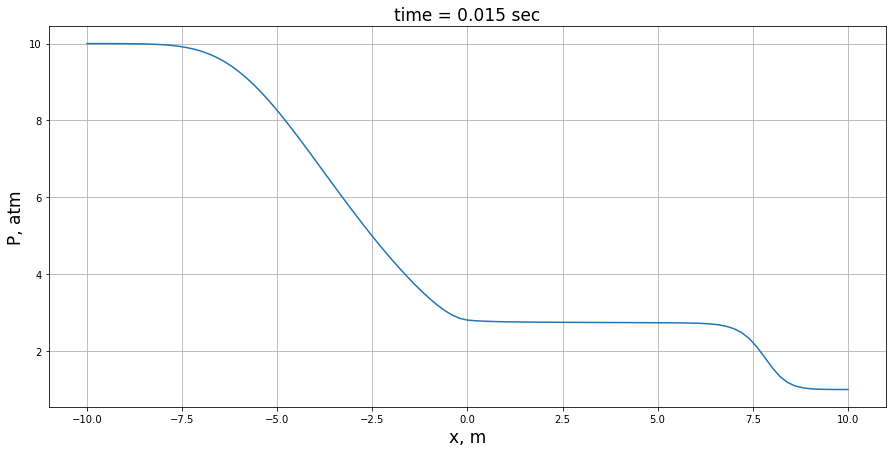

In [12]:
plt.figure(figsize=(15, 7))

plt.plot(x, 1e-5*Pressure)
plt.xlabel('x, m', fontsize=17)
plt.ylabel('P, atm', fontsize=17)
plt.title('time = 0.015 sec', fontsize=17)
plt.grid()